Нужно сгенерировать синтетический датасет для задачи регрессии, построить модель с использованием бэггинга, провести анализ результатов и оценить качество модели.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant


# Генерация данных

Сгенерируйте датасет, содержащий 1000 наблюдений и 10 признаков.
Пусть целевая переменная y будет линейной комбинацией признаков с добавлением гауссовского шума. Используйте (coefficients = np.random.randn(n_features)).
Разделите датасет на тренировочную (80%) и тестовую (20%) выборки.
Построение модели:

In [2]:
n_features = 10
samples = 1000

In [3]:
# y = w * X + b
X = np.random.randn(samples, n_features)
w_coefficient = np.random.randn(n_features)
b_noise = np.random.normal(0, 0.5, size=samples)

In [4]:
y = X @ w_coefficient + b_noise
df = pd.DataFrame(X, columns=[f'features_{i+1}' for i in range(n_features)])
df['target'] = y
df

,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,target
0,-0.390167,-1.596516,0.216300,-1.092585,1.101056,1.903645,2.067885,0.073038,0.047699,1.021506,5.563974
1,0.708741,0.474374,-1.147812,0.234469,-0.027050,0.948900,-1.317749,-0.071074,1.219156,-1.109042,-4.228480
2,0.819903,2.431429,2.399454,-0.654409,-0.084891,1.966819,-0.299499,0.103339,0.127754,-0.149580,-1.754557
3,-1.477138,0.008429,-1.139936,1.150746,-0.244626,1.677306,-1.332588,0.142267,0.360891,-0.633348,-2.291815
4,-0.100694,1.055515,0.555517,0.612213,-0.666142,0.157303,-1.905518,0.816773,-1.611031,1.374757,-0.662178
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.004974,0.925882,1.158502,0.099751,-2.031051,-0.773856,1.808555,0.210680,0.328766,-0.862532,-3.116221
996,2.651764,0.068590,0.210546,0.508040,-0.870299,0.032429,1.016970,0.069544,0.603775,1.110040,0.899301
997,0.644517,-0.984698,1.022768,0.916499,0.923068,1.069795,-0.802581,-0.128901,-0.126316,-0.420681,1.613231
998,3.053169,-1.188668,-0.228571,1.092893,0.342773,0.335438,-0.140931,-0.571665,1.511567,1.632978,3.086668


# Разделение данных

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :n_features], df['target'],
    train_size=0.80, random_state=42
)

# Бэггинг
Постройте модель с использованием бэггинга, где базовым алгоритмом будет линейная регрессия.
Оцените качество модели на тестовой выборке с использованием метрик MSE (Mean Squared Error) и R^2 (коэффициент детерминации).



In [6]:
pred = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=10
).fit(X_train, y_train)

In [7]:
y = pred.predict(X_test)

In [8]:
score_r2 = r2_score(y, y_test)
mse = mean_squared_error(y, y_test)
print(f'MSE: {mse:.2f}')
print(f"Коэффициент детерминации (R2): {score_r2:.2f}")

MSE: 0.23
Коэффициент детерминации (R2): 0.97


# Анализ

Проверьте мультиколлинеарность признаков (например, с помощью коэффициента корреляции и VIF).
Проведите анализ остатков модели (например, постройте графики остатков и проверьте их распределение).
Оцените важность признаков (например, с помощью коэффициентов модели).

## Корреляция 

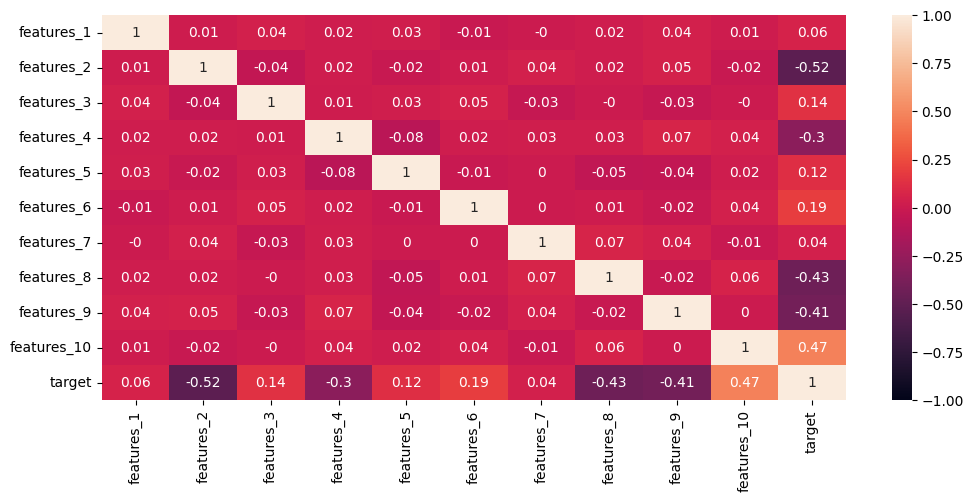

In [9]:
plt.figure(figsize=(12, 5))

sns.heatmap(round(df.corr(), 2), annot=True, vmin=-1, vmax=1)
plt.show()

## VIF

In [10]:
tmp = add_constant(df.drop('target', axis=1))

VIFs = pd.DataFrame()
VIFs['Name_Columns'] = tmp.columns
VIFs['VIF'] = [variance_inflation_factor(tmp.values, i) for i in range(tmp.shape[1])]
VIFs

,Name_Columns,VIF
0,const,1.018658
1,features_1,1.005055
2,features_2,1.006923
3,features_3,1.008408
4,features_4,1.014309
5,features_5,1.012268
6,features_6,1.005580
7,features_7,1.010267
8,features_8,1.014055
9,features_9,1.012717


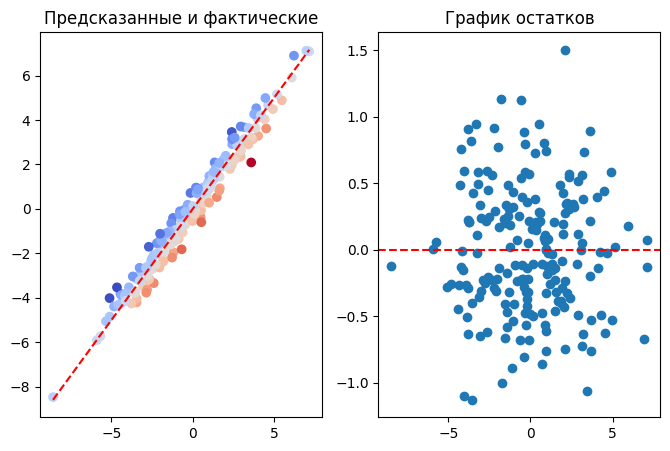

In [11]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y, c=y_test-y, cmap='coolwarm')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title('Предсказанные и фактические')

res = y_test - y

plt.subplot(1, 2, 2)
plt.scatter(y, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.show()

**Вывод:** нет высокой корреляции между целевым признаком и остальными предикторами, а также слабая мультиколлинеарность, показывающая уникальность каждого признака.
На графике "Предсказанные и фактические":
* синий - модель недооценила
* красный - переоценка